In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import warnings
warnings.simplefilter("ignore")

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [5]:
df=pd.read_csv(r"C:\Users\LENOVO\Music\WATER_QUALITY\water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
print(df.columns.tolist())

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [11]:
df["Potability"].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [12]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Potability']== 0]
df_minority = df[df['Potability']== 1]

# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=2500,random_state=100)
df_majority_downsampled = resample(df_majority, replace=True,n_samples=2500,random_state=100)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled,df_majority_downsampled])

# Display new class counts
df_balanced['Potability'].value_counts()

1    2500
0    2500
Name: Potability, dtype: int64

In [13]:
df=df_balanced
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2328,6.071839,217.826531,17162.753927,3.521125,319.037346,612.094926,16.542239,64.826308,2.691610,1
3248,6.260111,211.594112,18577.623969,7.154891,340.792574,357.098395,7.992210,82.365378,5.403615,1
375,5.991283,224.608563,29983.116007,7.383819,329.731547,604.631263,17.741228,65.116976,4.840562,1
1573,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
333,7.022952,264.525606,15978.355249,10.956205,262.064551,412.709423,5.315287,76.024491,4.971907,1
...,...,...,...,...,...,...,...,...,...,...
3093,9.537879,200.557507,20044.206252,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557,0
145,6.207433,192.937027,13442.603471,5.819023,325.906562,533.795851,14.687539,60.485033,3.549299,0
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166,0
2189,2.558103,147.490575,21316.506728,9.142234,312.054239,406.372019,11.519669,83.277583,2.817258,0


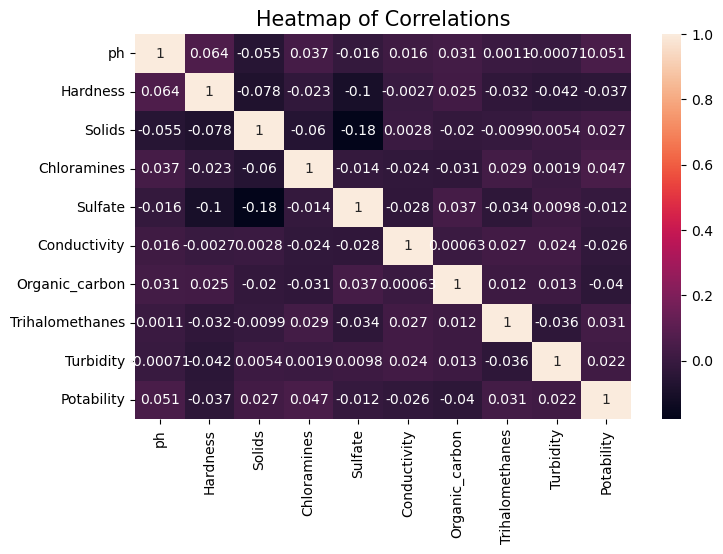

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True) # Select only numeric columns for correlation calculation
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [15]:
x = df.drop(columns=['Potability'])
y = df['Potability']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
x_train.shape

(3500, 9)

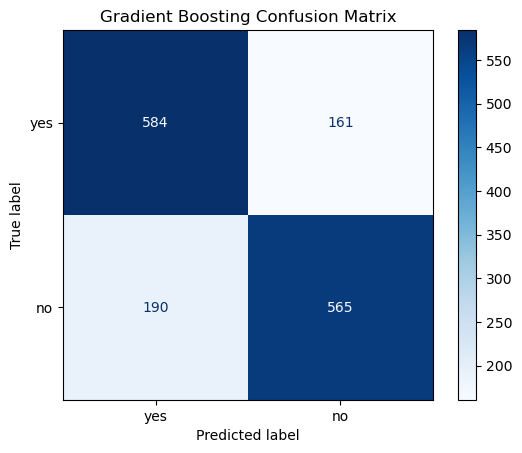

Gradient Boosting Model Accuracy: 0.77


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(random_state=42)  # Default hyperparameters

# Train the Gradient Boosting model
gbm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(x_test)

import pickle
pickle.dump(gbm_model, open(r'C:\Users\LENOVO\Music\WATER_QUALITY\FRONTEND\Water_gbm.pkl', 'wb'))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])  # Replace labels with your actual class names
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = gbm_model.score(x_test, y_test)
print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       745
           1       0.78      0.75      0.76       755

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500



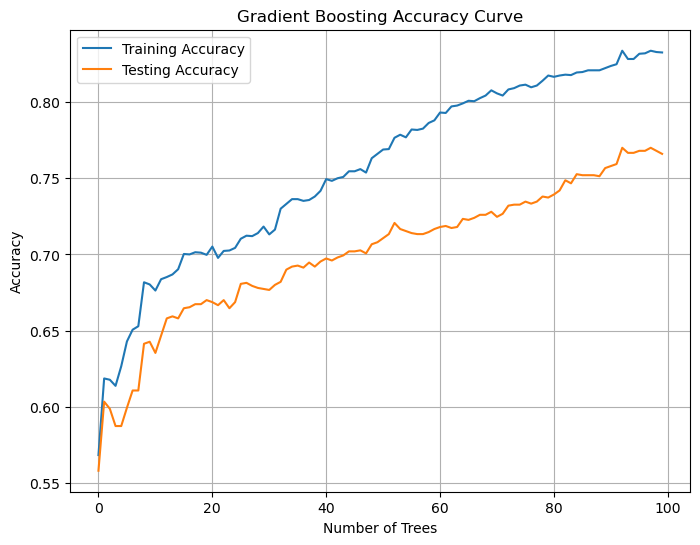

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize lists to store accuracies
train_accuracy = []
test_accuracy = []

# Train the model and record accuracy at each iteration
for n in range(1, gbm_model.n_estimators + 1):
    # Train the model with the first `n` estimators
    gbm_model.set_params(n_estimators=n)
    gbm_model.fit(x_train, y_train)

    # Predict and calculate accuracy
    train_pred = gbm_model.predict(x_train)
    test_pred = gbm_model.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(test_accuracy, label="Testing Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Accuracy Curve")
plt.legend()
plt.grid()
plt.show()


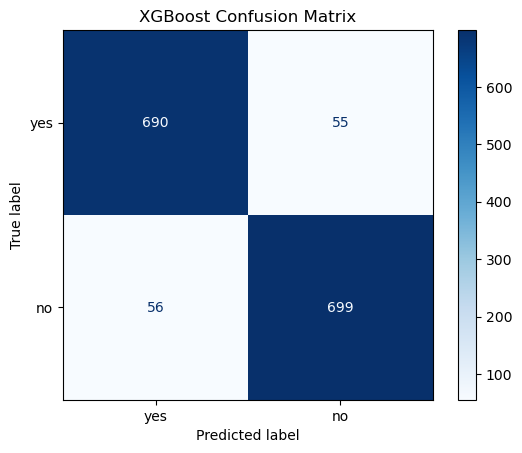

XGBoost Model Accuracy: 0.93


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(max_depth=5, n_estimators=100, random_state=42)  # You can adjust max_depth and n_estimators as needed

# Train the XGBoost model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

import pickle
pickle.dump(xgb_model, open(r'C:\Users\LENOVO\Music\WATER_QUALITY\FRONTEND\Water_xgb.pkl', 'wb'))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = xgb_model.score(x_test, y_test)
print(f"XGBoost Model Accuracy: {accuracy:.2f}")

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       745
           1       0.93      0.93      0.93       755

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



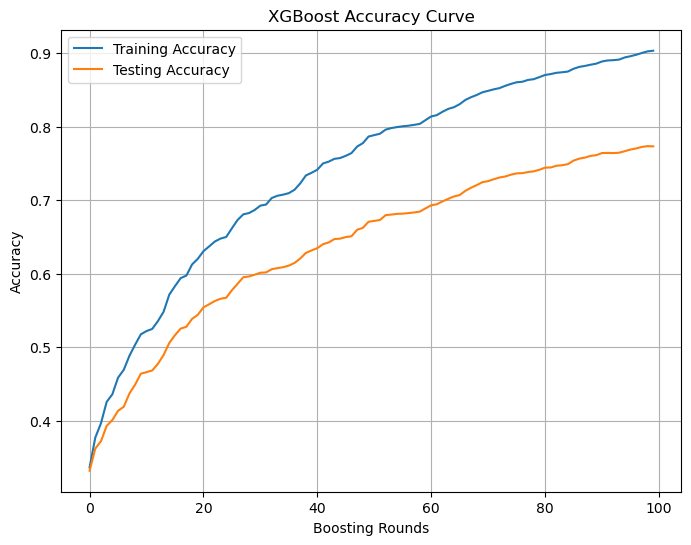

In [23]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(max_depth=5, n_estimators=100, random_state=42, eval_metric="logloss")

# Train the model with evaluation metrics
eval_set = [(x_train, y_train), (x_test, y_test)]
xgb_model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

# Extract accuracy metrics
results = xgb_model.evals_result()
train_accuracy = [1 - x for x in results['validation_0']['logloss']]  # Convert logloss to accuracy
test_accuracy = [1 - x for x in results['validation_1']['logloss']]  # Convert logloss to accuracy

# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(test_accuracy, label="Testing Accuracy")
plt.xlabel("Boosting Rounds")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy Curve")
plt.legend()
plt.grid()
plt.show()
